#### Vector stores
1. One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors
2.  and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar; to the embedded query.
3. Vector store takes care of storing embedded data and performing vector search for you.


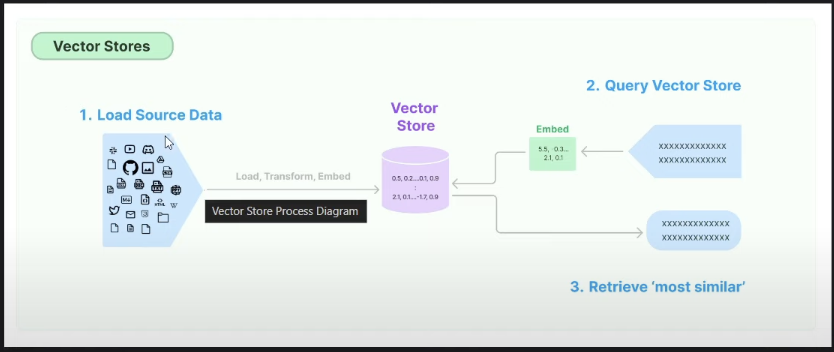

In [6]:
from IPython.display import Image
Image(filename='./data/VectorStores.png')


In [9]:
import os
from dotenv import load_dotenv
load_dotenv() # returns true if .env file exists, else false
SECRET_KEY = os.environ.get('OPEN_AI_KEY')

In [13]:
#%pip install chromadb

# load document
from langchain_community.document_loaders import TextLoader 
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter 
from langchain_community.vectorstores import Chroma
# there are other multiple alternatives to chromadb that we can use

loader = TextLoader('./data/history_vectorStores.txt')
history_doc = loader.load()

text_splitter = CharacterTextSplitter(chunk_size = 800,
                                      chunk_overlap = 0)
history_document = text_splitter.split_documents(history_doc)
# Embed Model object
embedding_funtion = OpenAIEmbeddings(openai_api_key = SECRET_KEY)

# Store
db = Chroma.from_documents(history_document, embedding_funtion) 

query ="How did India grew ? "

similar_doc1 = db.similarity_search(query)


# Vector Store retiever
retirever = db.as_retriever()

similar_doc = retirever.get_relevant_documents(query)

print(similar_doc1)
print(similar_doc)


In [ ]:
# Storing the vector database
# same as everything above, just change the line no 19 above to : 
db_connection = Chroma.from_documents(history_document, embedding_funtion, persist_directory='./chro_db') 
db.persist()
# once you load multiple files into the chroma db then you can ask questions and the gpt model 
# will find the relavant document in the chroma db and answer your questions

In [ ]:
retirever = db_connection.as_retriever(search_kwargs={'k':1})
# go to the Vector Stores documentation for more parameter options
# k is esentially the number of document object you want to print
similar_doc - retirever.get_relevant_documents(query)
print(similar_doc)